# Generalization with OOP: The SMABacktester Class

## Building the SMABacktester Class from scratch: Instantiation

In [210]:
import pandas as pd
import numpy as np
from itertools import product
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
plt.style.use('seaborn')

In [218]:
class SMABacktester():
    def __init__(self, symbol, SMA_S, SMA_L, start, end):
        self.symbol = symbol
        self.SMA_S = SMA_S
        self.SMA_L = SMA_L
        self.start = start
        self.end = end
        self.results = None
        self.get_data()
        self.prepare_data()
        
    def __repr__(self):
        return "SMABacktester: symbol = {}, SMA_S = {}, SMA_L = {}, start = {}, end = {}".\
        format(self.symbol, self.SMA_S, self.SMA_L, self.start, self.end)
        
    def get_data(self):
        raw = pd.read_csv("forex_pairs.csv", parse_dates = ["Date"], index_col = "Date")
        raw = raw[self.symbol].to_frame().dropna()
        raw = raw.loc[self.start:self.end].copy()
        raw.rename(columns={self.symbol: "price"}, inplace=True)
        raw["returns"] = np.log(raw / raw.loc[:,["price"]].shift(1))
        self.data = raw
        return raw
    
    def prepare_data(self):
        data = self.data.copy()
        data["SMA_S"] = data["price"].rolling(self.SMA_S).mean()
        data["SMA_L"] = data["price"].rolling(self.SMA_L).mean()
        self.data = data
    
    def set_parameters(self, SMA_S = None, SMA_L = None):
        if SMA_S is not None:
            self.SMA_S = SMA_S
            self.data['SMA_S'] = self.data['price'].rolling(self.SMA_S).mean()
            
        if SMA_L is not None:
            self.SMA_L = SMA_L
            self.data['SMA_L'] = self.data['price'].rolling(self.SMA_L).mean()
            
    def test_strategy(self):
        data = self.data.copy().dropna()
        data['position'] = np.where(data['SMA_S'] > data['SMA_L'], 1, -1)
        data['strategy'] = data['position'].shift(1) * data['returns']
        data.dropna(inplace=True)
        data['creturns'] = data['returns'].cumsum().apply(np.exp)
        data['cstrategy'] = data['strategy'].cumsum().apply(np.exp)
        self.results = data
        
        perf = data['cstrategy'].iloc[-1]
        outperf = perf - data['creturns'].iloc[-1]
        
        return round(perf, 6), round(outperf, 6)
    
    def plot_results(self):
        if self.results is None:
            print("Run test_strategy() before running plot_results()")
        else:
            self.results.loc[:,['creturns','cstrategy']]\
            .plot(title = "{} | SMA {} | SMA {}".format(self.symbol,\
            self.SMA_S, self.SMA_L),figsize=(12,8))
            
    def optimize_parameters(self, SMA_S_range, SMA_L_range):
        combinations = list(product(range(*SMA_S_range), range(*SMA_L_range)))
        
        results = []
        i = 0
        for comb in combinations:
            #Track iterations
            i+=1
            clear_output(wait=True)
            display('Iteration {} of {}. Combination SMA {}, SMA {}'.\
            format(i, str(len(combinations)), comb[0], comb[1]))
            
            #test strategy
            self.set_parameters(comb[0], comb[1])
            results.append(self.test_strategy()[0])
        
        #clearing output again so that there is no confusion 
        #about if the last iteration was the most optimal combination
        clear_output(wait=True)
        
        best_perf = np.max(results)
        opt = combinations[np.argmax(results)]
        
        self.set_parameters(opt[0], opt[1])
        self.test_strategy()
        
        many_results = pd.DataFrame(data = combinations, columns = ["SMA_S", 'SMA_L'])
        many_results['performance'] = results
        self.results_overview = many_results
        
        return opt, best_perf
        
        
            

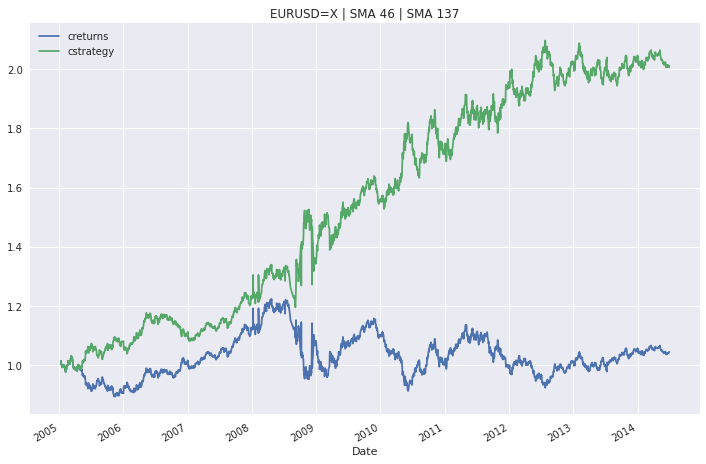

In [230]:
insample = SMABacktester("EURUSD=X", 50, 200, "2004-06-30", "2014-06-30")
insample.get_data()
insample.set_parameters()
#tester.get_data().isna().sum()
insample.prepare_data()
insample.test_strategy()
insample.optimize_parameters((1,50,1),(51,252,1))
insample.plot_results()

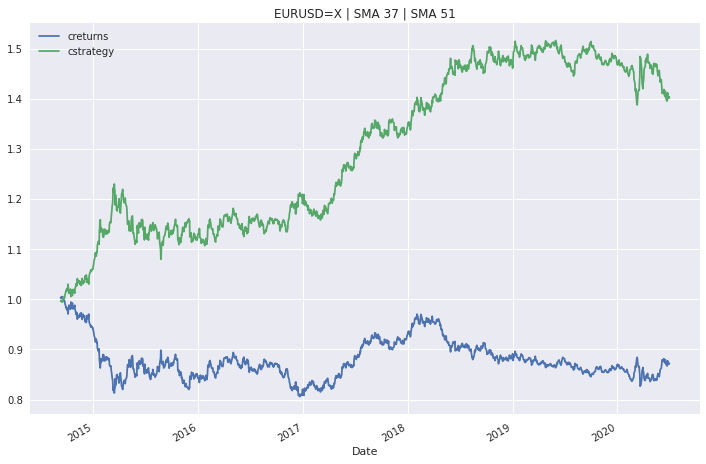

In [229]:
outsample = SMABacktester("EURUSD=X", 50, 200, "2014-07-01", "2020-06-30")
outsample.get_data()
#tester.get_data().isna().sum()
outsample.prepare_data()
outsample.set_parameters(46,137)
outsample.test_strategy()
#insample.optimize_parameters((1,50,1),(51,252,1))

outsample.optimize_parameters((1,50,1),(51,252,1))
outsample.plot_results()

## Using the SMABacktester Class

In [143]:
tester.results_overview

,SMA_S,SMA_L,performance
0,46,120,1.950838
1,46,121,1.926555
2,46,122,1.886600
3,46,123,2.031139
4,46,124,1.860801
...,...,...,...
115,49,145,2.029679
116,49,146,2.050829
117,49,147,1.989033
118,49,148,2.041901


__Backtesting & Forward Testing__

__AUD/EUR__

## Method get_data()

## Setting new SMA Paramters

## Testing a Strategy

## Plotting the results

## Strategy Optimization

## Splitting get_data() and adding prepare_data() 

## String Representation & Docstrings